In [1]:
from maelzel.core import *

Chain([4C:1♩:gliss=True:symbols=[Hairpin(anchor=4C, direction=>, kind=start, uuid=zncixbbp)], 4A+, R:1♩:symbols=[Hairpin(anchor=Rest, direction=>, kind=end, uuid=zncixbbp)]])
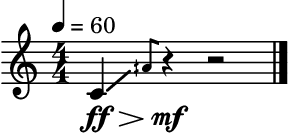

In [2]:
n = Note(60, dynamic='ff', gliss=True)
m = Note("4A+!", dur=0)
o = Rest(1, dynamic='mf')
ch = Chain([n, m, o])
ch.addSpanner('>')
ch

Chain([4C:1♩:symbols=[Hairpin(anchor=4C, direction=<, kind=start, uuid=l6p1fnj0)], 4D:1/2♩, 4E:1♩])
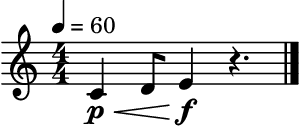

In [3]:
chain = Chain([
    Note("4C", 1, dynamic='p').addSpanner("<"),
    Note("4D", 0.5),
    Note("4E", dynamic='f')   # This ends the hairpin spanner
])
chain

Chain([4C:4/3♩:symbols=[Hairpin(anchor=4C, direction=<, kind=start, uuid=ldyvwki5)], 4D:1/2♩:symbols=[Slur(anchor=4D, kind=start, uuid=jjsk1wt6)], 4E:1♩:symbols=[Slur(anchor=4E, kind=end, uuid=b44ya6m8)], 4F:1/2♩])
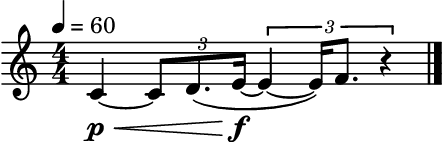

In [2]:
chain = Chain([
    Note("4C", 1+F(1, 3), dynamic='p').addSpanner("<"),
    Note("4D", 0.5).addSpanner("slur"),
    Note("4E", dynamic='f').addSpanner('~slur'),   # This ends the hairpin spanner
    Note("4F", 0.5),
])
chain

Chain([4C:1♩:symbols=[Slur(anchor=4C, kind=start, uuid=iqjwtd2l)], 4D:1♩:symbols=[Slur(anchor=4D, kind=start, uuid=hu9znwbn)], 4E:1♩:symbols=[Slur(anchor=4E, kind=end, uuid=iaxxz1zm)], 4F:1♩:symbols=[Slur(anchor=4F, kind=end, uuid=phejvlo8)]])
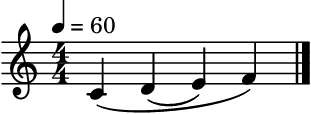

In [1]:
from maelzel.core import *

ch = Chain([
    Note("4C", 1).addSpanner("slur"),
    Note("4D", 1).addSpanner("slur"),
    Note("4E", 1).addSpanner("~slur"),
    Note("4F", 1).addSpanner("~slur")

])
# ch.matchOrfanSpanners()
# ch.quantizedScore().dump()
ch

Chain([4C:4/3♩:symbols=[Hairpin(anchor=4C, direction=<, kind=start, uuid=23wf0mpx)], 4D:1/2♩:symbols=[Slur(anchor=4D, kind=start, uuid=5toc2jr3)], R:1♩, 4F:1/2♩:symbols=[Slur(anchor=4F, kind=end, uuid=rhrtlory)]])
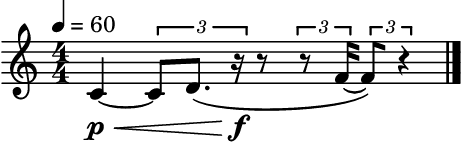

In [3]:
chain = Chain([
    Note("4C", 1+F(1, 3), dynamic='p').addSpanner("<"),
    Note("4D", 0.5).addSpanner("slur"),
    Rest(1, dynamic='f'),   # This ends the hairpin spanner
    Note("4F", 0.5).addSpanner('~slur'),
])
chain